In [11]:
import json
record = []
for line in open('20220626', 'r'):
    record.append(json.loads(line))
# for i in record:
#     print(i['name'])
# print(record)

#HitLevelGood
#Note Hit
#HitNotes
#Note Hit5
#Note Miss
#Game End


In [12]:
hit_level_list=[]
Note_Number_list=[]
MusicScene_Direction_list=[]
for i in range(len(record)):
    if record[i]['name']=='Note Hit':
        custom_parameters=record[i]['custom_params']
        custom_parameters.items()
        list_total = list(custom_parameters.items())
        list_key =list(custom_parameters.keys())
        list_value=list(custom_parameters.values())
#         print(list_value)
        hit_level_list.append(list_value[0])
        Note_Number_list.append(list_value[1])
        for i in list_value:
            if i=='Never_Gonna_Give_You_Up.mid':
                MusicScene_Direction_list.append(list_value[1:4])

# MusicScene_Direction_list

In [13]:
# create a combined dataframe with a list of Note Number, MusicScene, and Direction.
import pandas as pd
df = pd.DataFrame (MusicScene_Direction_list, columns = ['Note Number', 'MusicScene','Direction'])
print (df)

   Note Number                   MusicScene Direction
0           22  Never_Gonna_Give_You_Up.mid     Right
1           36  Never_Gonna_Give_You_Up.mid     Right
2           17  Never_Gonna_Give_You_Up.mid     Right
3            6  Never_Gonna_Give_You_Up.mid        Up
4           18  Never_Gonna_Give_You_Up.mid     Right
5           25  Never_Gonna_Give_You_Up.mid     Right
6           43  Never_Gonna_Give_You_Up.mid        Up
7           33  Never_Gonna_Give_You_Up.mid     Right
8            1  Never_Gonna_Give_You_Up.mid        Up
9           10  Never_Gonna_Give_You_Up.mid        Up
10          20  Never_Gonna_Give_You_Up.mid     Right
11          46  Never_Gonna_Give_You_Up.mid        Up
12           8  Never_Gonna_Give_You_Up.mid        Up
13          13  Never_Gonna_Give_You_Up.mid      Left
14          44  Never_Gonna_Give_You_Up.mid        Up
15          26  Never_Gonna_Give_You_Up.mid     Right
16          28  Never_Gonna_Give_You_Up.mid      Left
17           9  Never_Gonna_

In [14]:
# create a combined dataframe with a list of Hit Level and Note Number.
import pandas as pd

zipped = list(zip(hit_level_list,Note_Number_list))
df_2 = pd.DataFrame(zipped, columns=['Hit Level', 'Note Number'])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_2)
    

    Hit Level Note Number
0     Perfect          22
1     Perfect           1
2     Invalid          32
3        Good          37
4        Good          12
5        Good          56
6        Good          13
7        Good          62
8     Perfect          47
9        Good          16
10        Bad          25
11       Good          18
12       Good          52
13       Good           1
14    Perfect          36
15    Perfect          17
16    Perfect          17
17       Good          44
18       Good           8
19       Good          41
20       Good          26
21    Perfect          32
22       Good           6
23       Good          21
24    Perfect          18
25    Perfect          17
26       Good          39
27       Good          58
28    Perfect           5
29    Perfect           9
30    Perfect          25
31       Good           5
32       Good           5
33       Good           3
34    Invalid          15
35    Perfect          43
36    Perfect          33
37    Perfec

In [15]:
#Merge Two Dataframe into One
result = pd.merge(df_2,
                 df[['Note Number', 'MusicScene','Direction']],
                 on='Note Number')
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(result)

    Hit Level Note Number                   MusicScene Direction
0     Perfect          22  Never_Gonna_Give_You_Up.mid     Right
1        Good          22  Never_Gonna_Give_You_Up.mid     Right
2        Good          22  Never_Gonna_Give_You_Up.mid     Right
3        Good          22  Never_Gonna_Give_You_Up.mid     Right
4        Good          22  Never_Gonna_Give_You_Up.mid     Right
5     Perfect           1  Never_Gonna_Give_You_Up.mid        Up
6        Good           1  Never_Gonna_Give_You_Up.mid        Up
7     Perfect           1  Never_Gonna_Give_You_Up.mid        Up
8        Good           1  Never_Gonna_Give_You_Up.mid        Up
9        Good           1  Never_Gonna_Give_You_Up.mid        Up
10       Good           1  Never_Gonna_Give_You_Up.mid        Up
11       Good           1  Never_Gonna_Give_You_Up.mid        Up
12    Invalid          32  Never_Gonna_Give_You_Up.mid     Right
13    Perfect          32  Never_Gonna_Give_You_Up.mid     Right
14       Good          32

In [7]:
Hit_Level_Frequency = result['Hit Level'].value_counts()
print(Hit_Level_Frequency)

Good       139
Perfect     78
Bad         10
Invalid      6
Name: Hit Level, dtype: int64


In [16]:
Note_Number_Frequency = result['Note Number'].value_counts()
print(Note_Number_Frequency)
Max_Note_Number = Note_Number_Frequency.max()
Min_Note_Number=Note_Number_Frequency.min()
print(Max_Note_Number)
print(Min_Note_Number)

6     9
10    8
2     8
3     8
12    7
7     7
5     7
1     7
11    7
4     7
15    6
21    6
16    6
9     6
29    5
31    5
24    5
14    5
23    5
20    5
19    5
27    5
22    5
13    5
32    5
8     5
17    5
18    5
25    5
26    4
30    4
28    4
43    3
38    3
37    3
48    3
45    3
49    3
33    3
47    3
44    3
41    3
39    3
40    3
42    2
36    2
46    2
34    2
0     2
35    1
Name: Note Number, dtype: int64
9
1


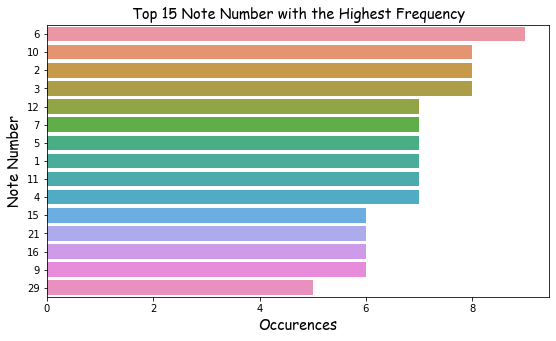

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_order = Note_Number_Frequency.head(15).index
plt.figure(figsize=(9, 5))
sns.countplot(data=result, y='Note Number', order=_order)
plt.title('Top 15 Note Number with the Highest Frequency', fontsize=14.5, fontname='Comic Sans MS')
plt.xlabel('Occurences', fontsize=14.5,fontname='Comic Sans MS')
plt.ylabel('Note Number', fontsize=14.5,fontname='Comic Sans MS');

In [18]:
Direction_Frequency= result['Direction'].value_counts()
print(Direction_Frequency)
Max_Direction_Frequency = Direction_Frequency.max()
Min_Direction_Frequency = Direction_Frequency.min()
print(f'The most frequent applied direction is {Max_Direction_Frequency}')
print(f'The least frequent applied direction is {Min_Direction_Frequency}')


Up       105
Right     95
Left      33
Name: Direction, dtype: int64
The most frequent applied direction is 105
The least frequent applied direction is 33


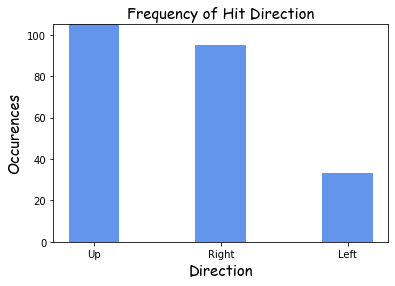

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# #visualization: Plot a dataframe to a bar plot.

# create dataset
Direction_= [105, 95, 33]
bars = ('Up', 'Right', 'Left')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos,width=0.4,height=Direction_, color = 'cornflowerblue')
 
# Add title and axis names
plt.title('Frequency of Hit Direction', fontsize=15, fontname='Comic Sans MS')
plt.xlabel('Direction', fontsize=15,fontname='Comic Sans MS')
plt.ylabel('Occurences', fontsize=15,fontname='Comic Sans MS')


# Create names on the x axis
plt.xticks(x_pos, bars)

plt.ylim(top = max(Direction_))
# Show graph
plt.show()

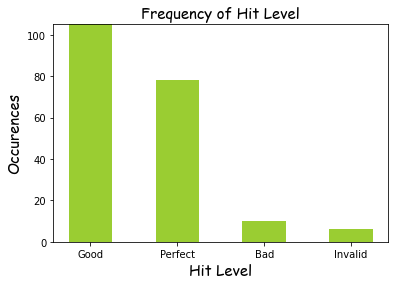

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# create dataset
Hit_Level_= [139, 78, 10, 6]
bars = ('Good', 'Perfect', 'Bad','Invalid')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos,width=0.5,height=Hit_Level_, color = 'yellowgreen')
 
# Add title and axis names
plt.title('Frequency of Hit Level', fontsize=15, fontname='Comic Sans MS')
plt.xlabel('Hit Level', fontsize=15,fontname='Comic Sans MS')
plt.ylabel('Occurences', fontsize=15,fontname='Comic Sans MS')


# Create names on the x axis
plt.xticks(x_pos, bars)

plt.ylim(top = max(Direction_))
# Show graph
plt.show()
 